## **住宅情報の分析**

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import math
#np.set_printoptions(threshold=100) 

***

### **【問題1】データセットの取得**  
pd.read_csv()を使用して、変数に格納してください。

In [2]:
df = pd.read_csv("train.csv")
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


***

### **【問題2】データセット自体の調査**  
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

アイオワ州エイムスの住宅価格を左右する79の要素が収納されているデータセット

***

### **【問題3】データの確認**  
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。


- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

***

- 各特徴量がどういったものかを見る（数値データか文字データなど）

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- 今回の目的変数はどの列か確認する

In [5]:
print("目的変数は「SalePrice（＄での販売価格）」で、列番号{}にある。".format(df.columns.get_loc("SalePrice")))
print("列番号は0から始まることに留意")

目的変数は「SalePrice（＄での販売価格）」で、列番号80にある。
列番号は0から始まることに留意


- 特徴量の平均値と標準偏差、四分位数を一度に表示させる

In [6]:
"""
count：要素の個数
mean：平均値
std：標準偏差
min：最小値
25%：1/4分位数
50%：中央値（median） 3/4分位数
75%：3/4分位数
max：最大値
"""
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

***

### **【問題4】欠損値への対応**  
欠損値に関して以下のことを行い、レポートしてください。


- 各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)  

- 欠損値が何パーセント含まれるかを確認する。
- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。

***

- 各特徴量の欠損値の有無を確認する

In [7]:
#まずはisnull()で確認
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [8]:
#欠損値の合計
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [9]:
#欠損値の合計（1以上の特徴量に関して表示）
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

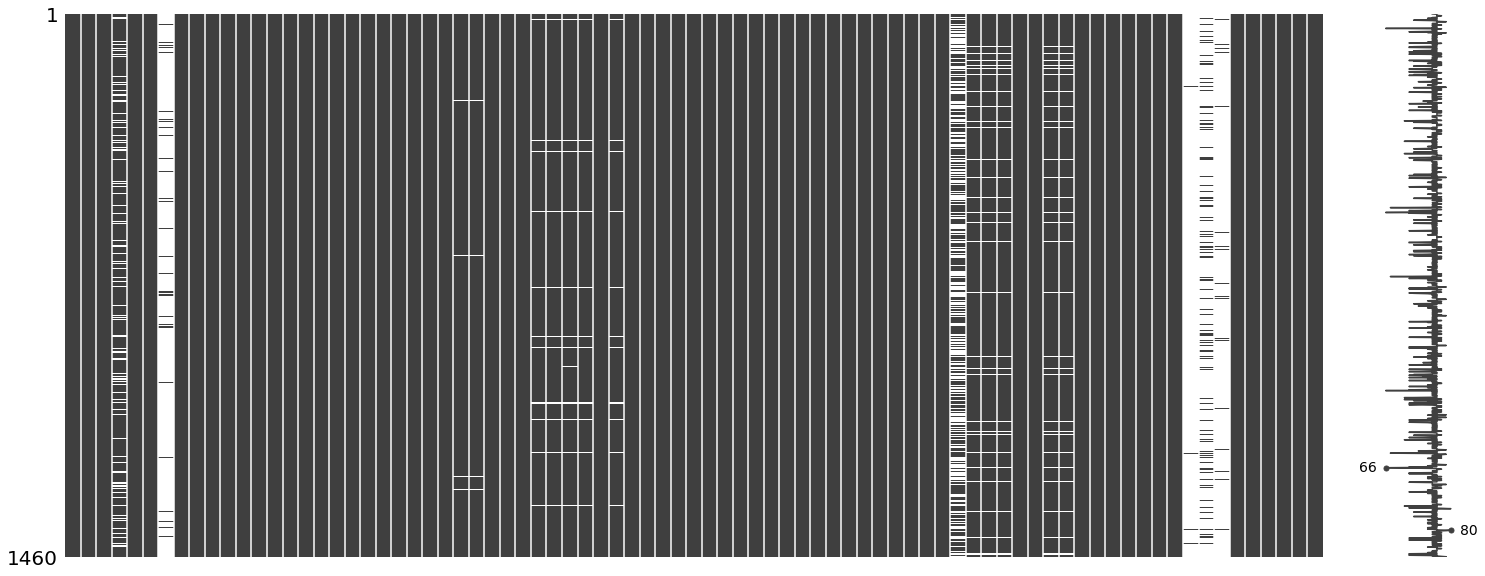

In [10]:
#missingnoのmatrixで欠損値を可視化
import missingno as msno

msno.matrix(df)

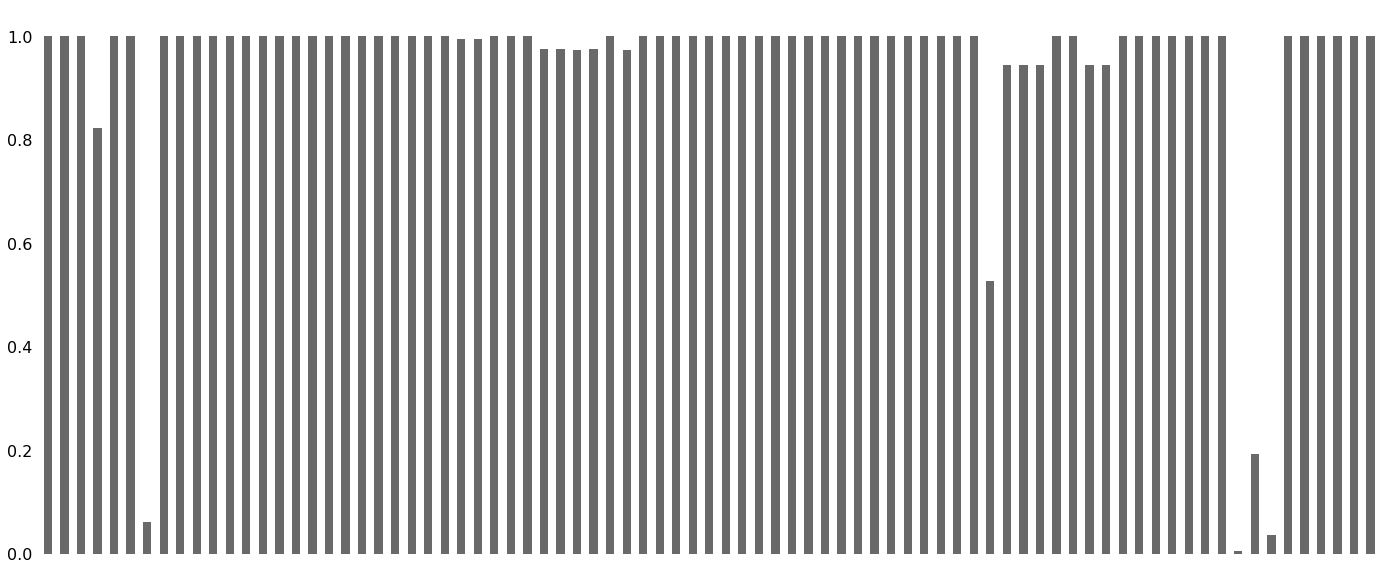

In [11]:
#missingnoのbarで正常値の割合を可視化
msno.bar(df)

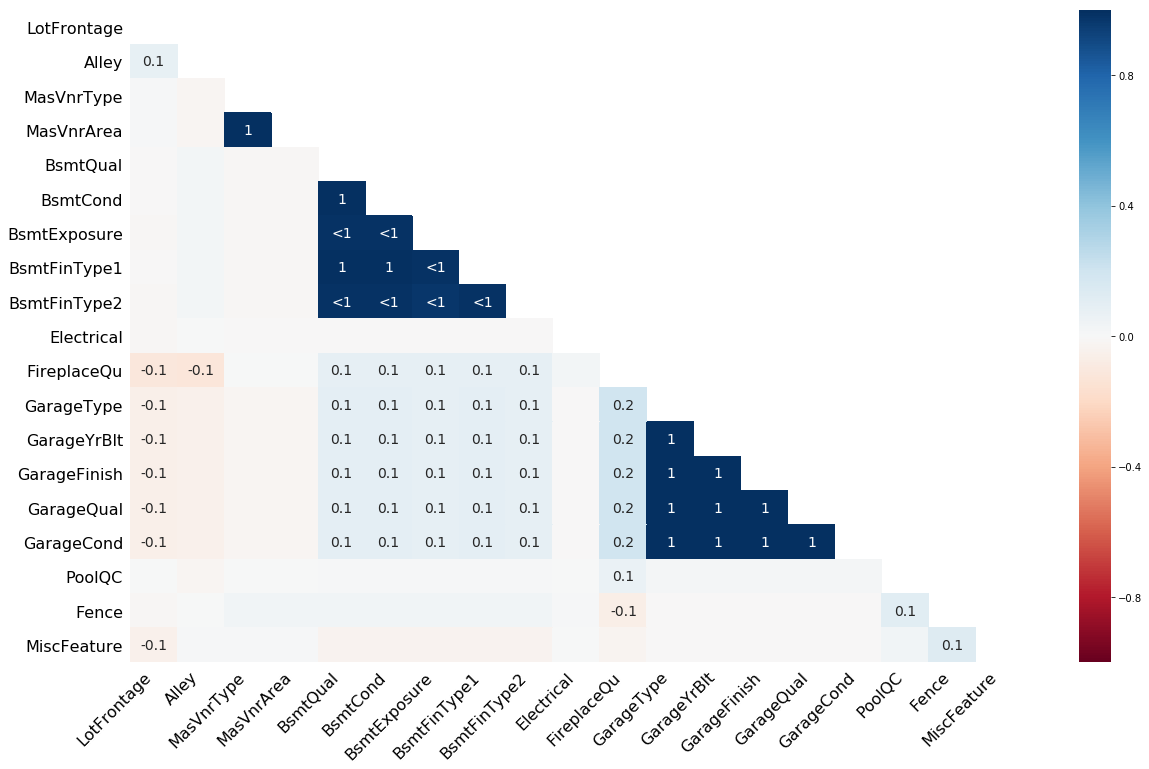

In [12]:
#欠損値における各特徴量間の相関度を表したヒートマップ
msno.heatmap(df)

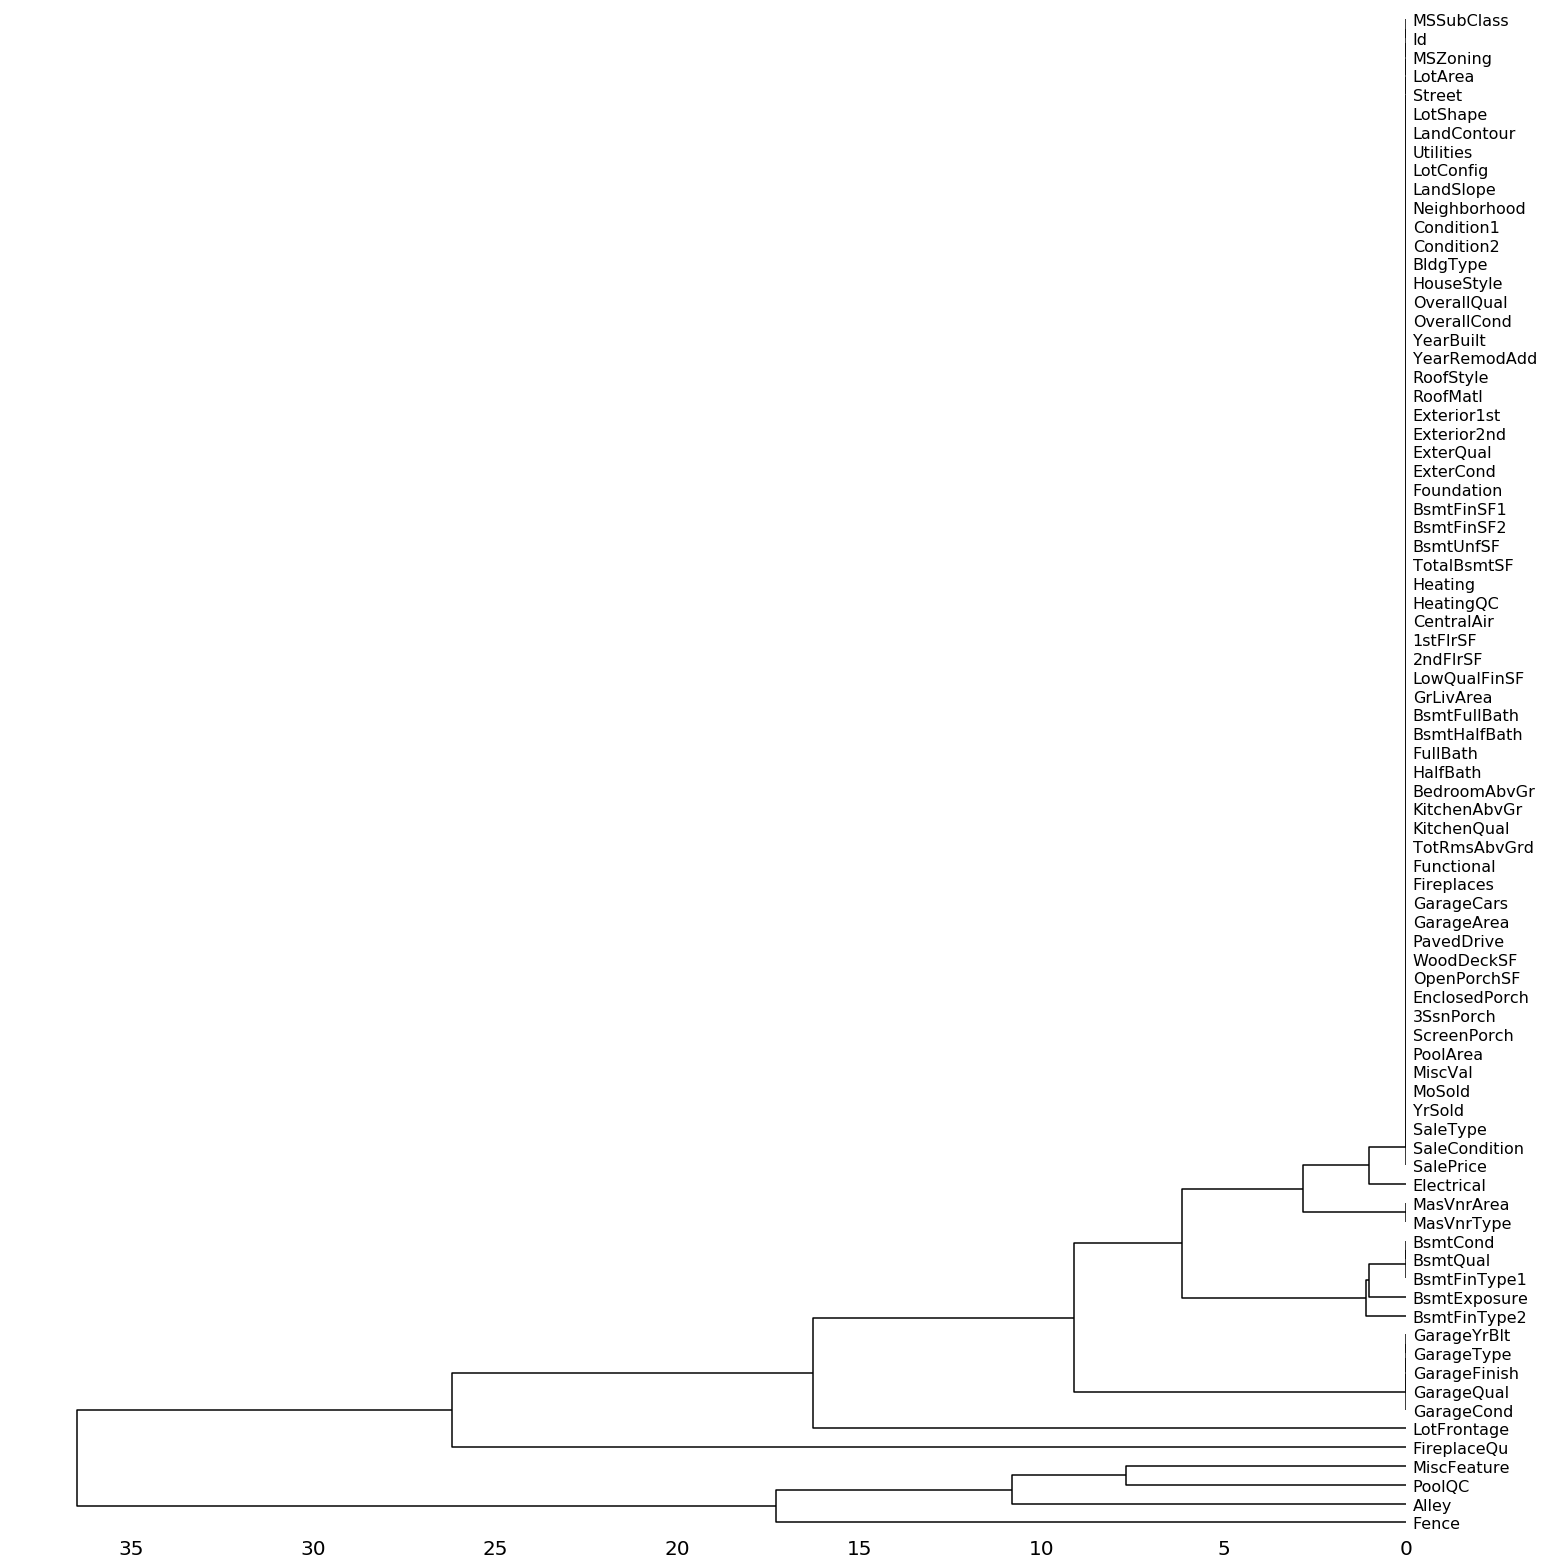

In [13]:
#欠損値における各特徴量間の相関度を表したヒートマップ
msno.dendrogram(df)

- 欠損値が何パーセント含まれるかを確認する

In [14]:
missing_value_rate = pd.concat([df.isnull().sum(), df.isnull().sum() / 1460], axis=1)
missing_value_rate.rename(columns={0:"Total", 1:"missing_ratio"})
#missing_ratio = pd.DataFrame(df.d, columns=["Total", "missing_ratio"])

,Total,missing_ratio
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,0.177397
LotArea,0,0.000000
Street,0,0.000000
Alley,1369,0.937671
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


- 5つ以上欠損値がある特徴量（列）は削除する  
[pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [15]:
#欠損値ではない要素の数が1456以上含まれている列は残し、それ以外は削除
df1 = df.dropna(thresh=1460-4, axis=1)
df1

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


- 欠損値があるサンプル（行）は削除する

In [16]:
df2 = df1.dropna() #デフォルトは行
df2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


***

次は目的変数がどのような分布を持っているか確認していきます。  

### **【問題5】用語の調査**  
以下の２つの単語を知る必要があります。これらを調査してまとめてください。


- 尖度
- 歪度

- 尖度（せんど）  
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。  
正規分布では0、正規分布より尖った分布では正の値、扁平な分布では負の値をとる。  


- 歪度（わいど）  
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと。  
左右対称の分布では0、左に偏った分布では正の値、右に偏った分布では負の値をとる。  

>[歪度と尖度](https://bellcurve.jp/statistics/course/17950.html)

***

### **【問題6】分布の確認**  
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。  
[seaborn.distplot — seaborn 0.9.0 documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html)  
[scipy.stats.skew ](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.skew.html)  
[scipy.stats.kurtosis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)

尖度：6.509812011089439
歪度：1.880940746034036


/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


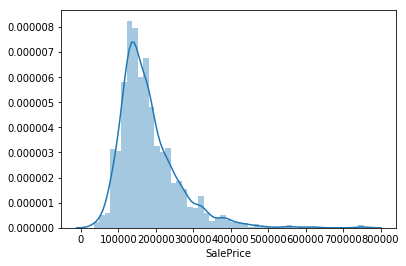

In [17]:
sns.distplot(df.SalePrice)

#尖度
print("尖度：{}".format(scipy.stats.kurtosis(df.SalePrice)))

#歪度
print("歪度：{}".format(scipy.stats.skew(df.SalePrice)))

In [18]:
#目的変数に対して対数変換
log_SalePrice = np.log(df.SalePrice)
log_SalePrice

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


尖度：0.8026555069117713
歪度：0.1212103673013655


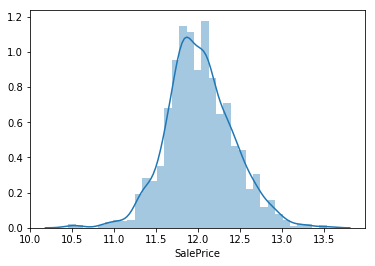

In [19]:
#対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する

sns.distplot(log_SalePrice)

#尖度
print("尖度：{}".format(scipy.stats.kurtosis(log_SalePrice)))

#歪度
print("歪度：{}".format(scipy.stats.skew(log_SalePrice)))

対数変換をすることによって、
- 正規分布の形に近くなった。（np.log10() でも試してみたが同様）  
- 横軸のとる値の範囲が狭くなり、縦軸は逆に大きくなった。

***

### **【問題7】相関係数の確認**  
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。


- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

《補足》  
重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

***

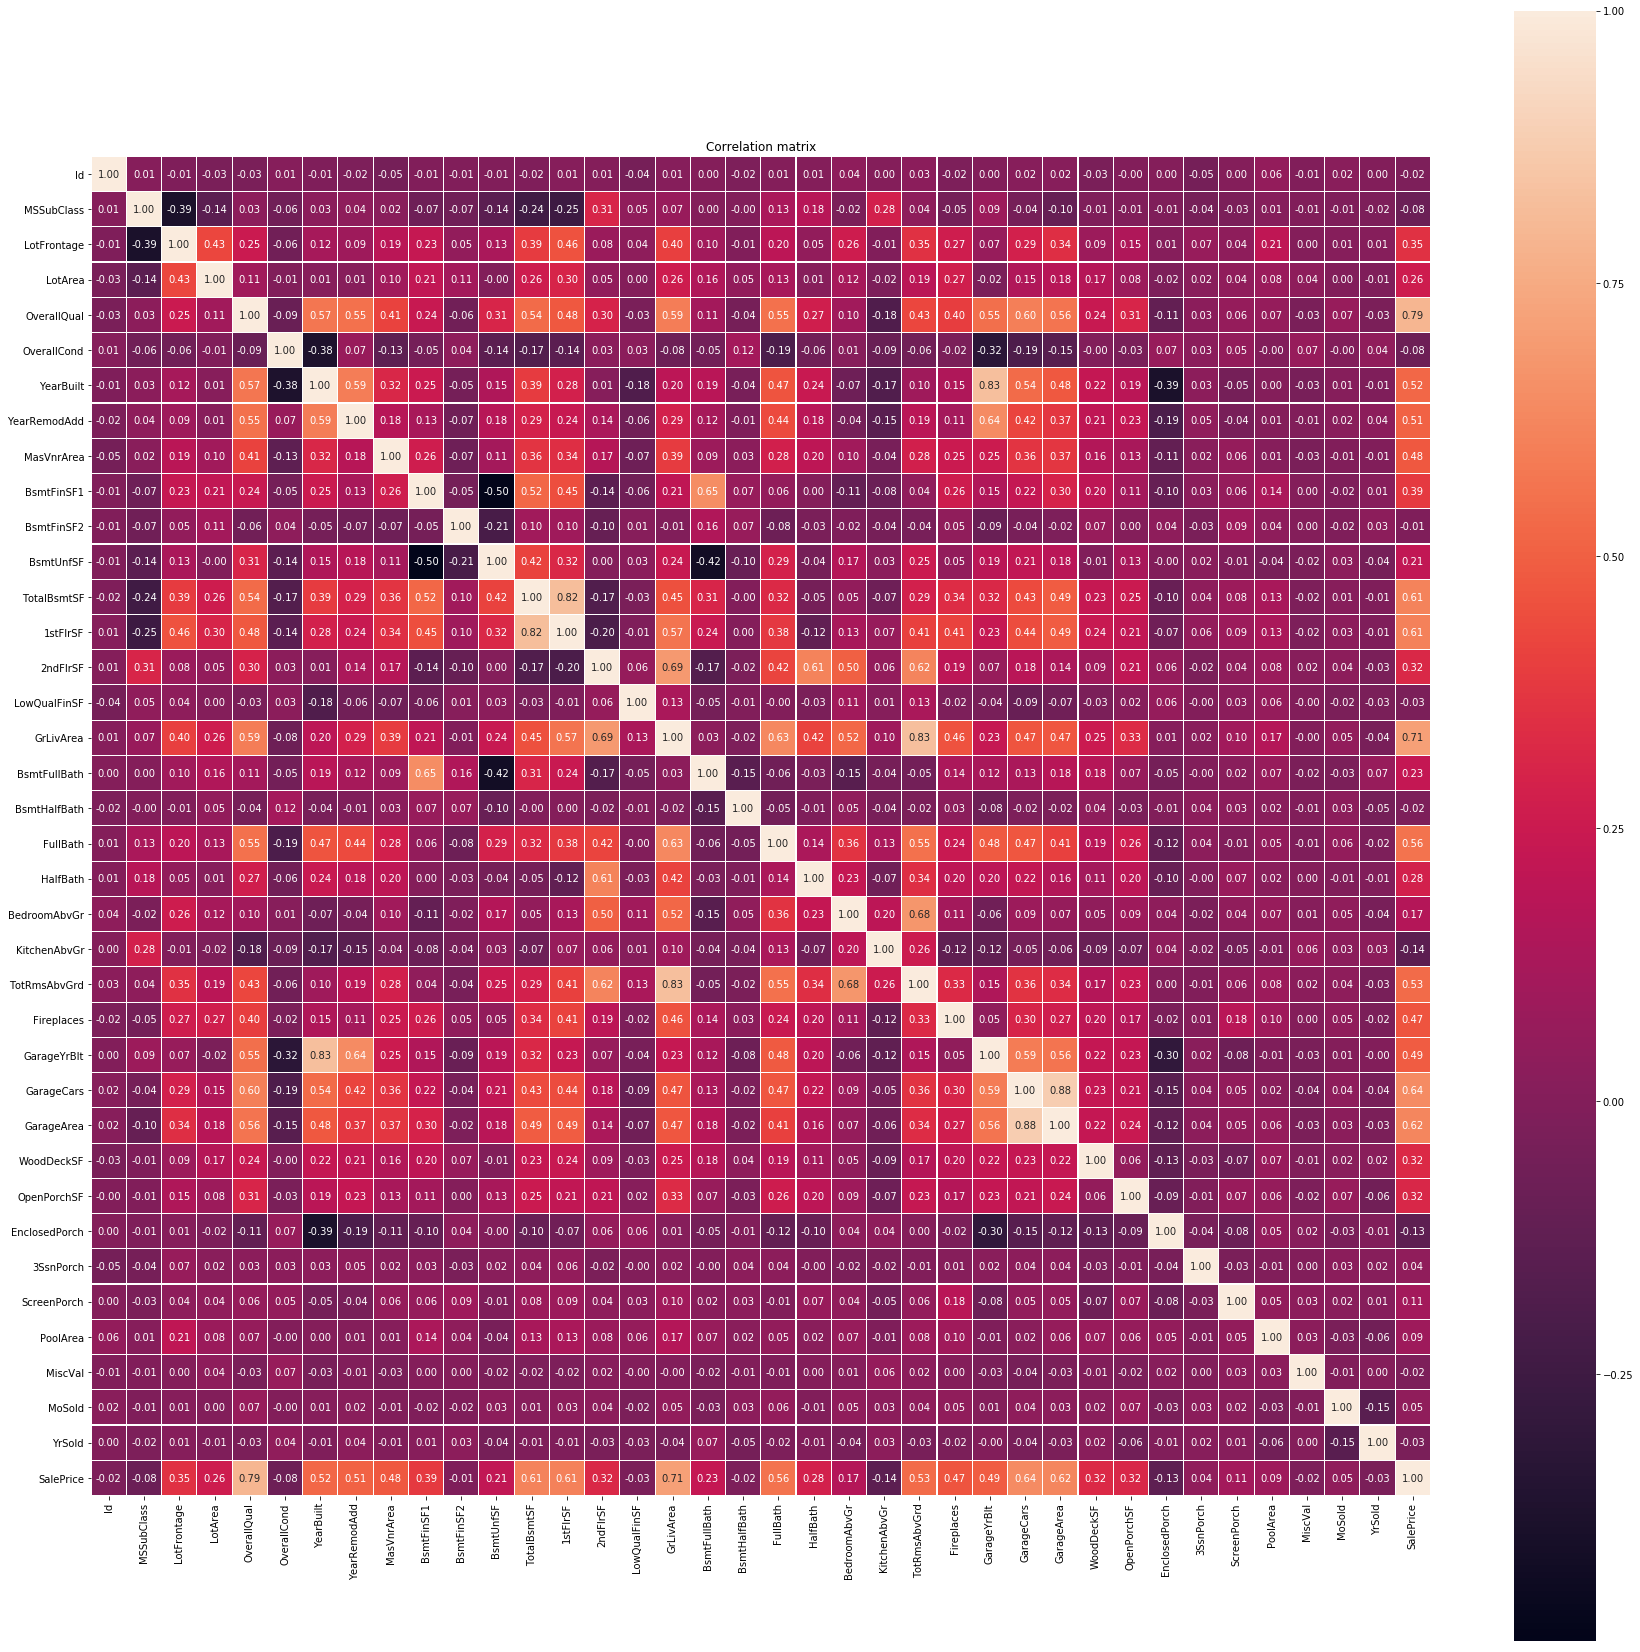

In [20]:
#相関係数行列のヒートマップを作り、相関係数の高い関係を見つける
fig = plt.figure(figsize=(30, 30))
plt.title('Correlation matrix')

sns.heatmap(df.corr(), linewidths=0.1, linecolor="white", square=True, annot=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

GrageCars--GarageArea、1stFlrSF--TotalBsmtSF、TotRmsAbvGrd--GrLivArea、YearBulit--garageYrBitは相関が高い。  
相関係数にはマイナスがある。

In [21]:
#目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
#選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す

se_corr_saleprice  = df.corr()["SalePrice"].sort_values(ascending=False)
display(se_corr_saleprice[1:11])

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

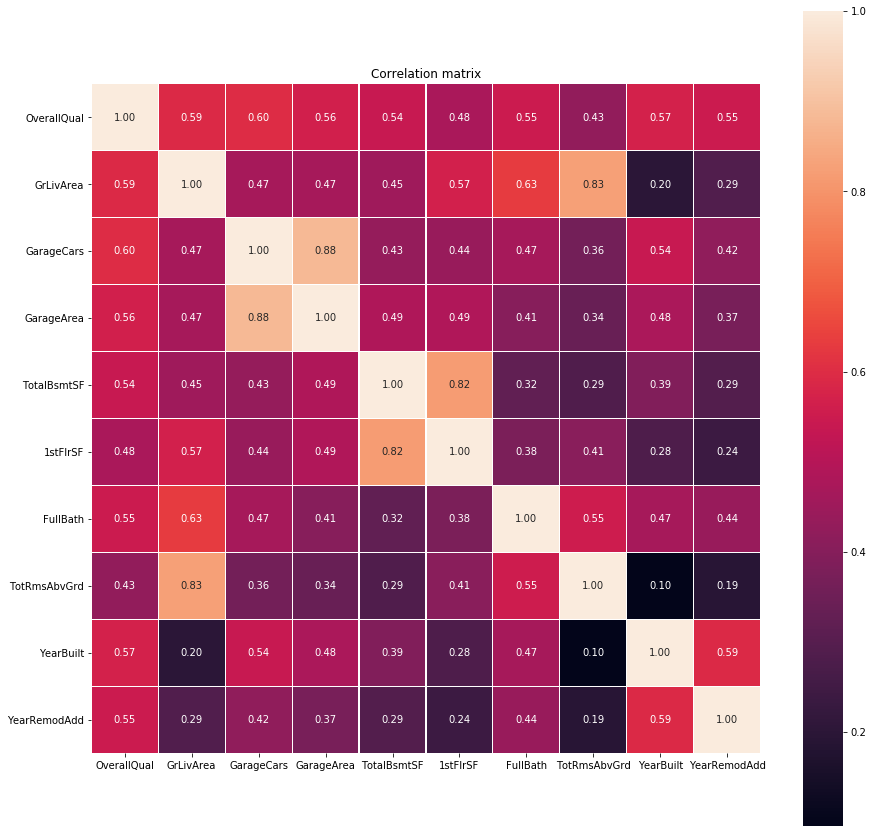

In [22]:
df_corr_saleprice = df[se_corr_saleprice[1:11].index]


fig = plt.figure(figsize=(15, 15))
plt.title('Correlation matrix')

sns.heatmap(df_corr_saleprice.corr(), linewidths=0.1, linecolor="white", square=True, annot=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

GrageCars--GarageArea、1stFlrSF--TotalBsmtSF、TotRmsAbvGrd--GrLivArea間は相関が高い。  

OverallQual:全体的な材料と仕上げの品質  
GrLivArea：グレード（地上）のリビングエリアの平方フィート  
GarageCars：車の容量のガレージのサイズ  
GarageArea：ガレージの平方フィートでのサイズ  
TotalBsmtSF：地下室の総平方フィート  
1stFlrSF：1階平方フィート  
FullBath：グレード以上のフルバスルーム  
TotRmsAbvGrd：グレード以上の部屋の合計  
YearBuilt：元の建設日  
YearRemodAdd：改造日  